# Disaster Tweet Text Classification

**Author:** [Tarun R Jain](https://twitter.com/TRJ_0751)<br>

## Introduction

Text can be an extremely rich source of information, but extracting insights from it can be hard and time-consuming, due to its unstructured nature.But, thanks to advances in natural language processing and machine learning, which both fall under the vast umbrella of artificial intelligence, sorting text data is getting easier.

In this article we shall look through an example for Text Classification uing LSTM. 

Download Dataset: [NLP Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [50]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [5]:
training_data.sample(2)

,id,keyword,location,text,target
6996,10032,twister,"Calgary, Alberta",Anyone wanna come over and watch Twister with ...,0
2402,3459,derailed,"Washington, DC",Happy no one was hurt when #wmata train derail...,1


In [6]:
training_data['text'].isnull().sum()

0

## Text Preprocessing Techniques

### Convert the entire text into lower case

In [9]:
training_data['new_text'] = training_data['text'].apply(lambda x:x.lower())

In [10]:
lemm=WordNetLemmatizer()

### Perform Lemmatization

Lemmatization is the process wherein the context is used to convert a word to its meaningful base or root form. Now, let's try to simplify the above formal definition to get a better intuition of Lemmatization.

For example:

loving is lemmatized as love
loved => love

In [11]:
training_data['new_text'] = training_data['new_text'].apply(lambda x:lemm.lemmatize(x))

### Remove StopWords

Stop words are frequently used words that carry very little meaning. Stop words are words that are so common they are basically ignored by typical tokenizers. By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: "a", "an", "the", "of", "in", and so on..

In [12]:
stop_words = stopwords.words("english")

In [13]:
def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

In [17]:
training_data['new_text'] = training_data['new_text'].apply(remove_stopwords)

### Remove unwanted text- Text Cleaning

In [17]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    text = re.sub(r'#', '', text)
    return text

In [19]:
training_data['new_text'] = training_data['new_text'].apply(clean_text)

### Removes all punctuation from a string, if present

In [21]:
def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [22]:
training_data['new_text'] = training_data['new_text'].apply(remove_punctuation_func)

In [24]:
training_data.sample(5)

,id,keyword,location,text,target,new_text
1897,2728,crushed,"Conroe, TX",@CBSBigBrother ouch Clelli....you could almost...,0,cbsbigbrother ouch clelli you could almost...
6056,8655,sinkhole,ill yorker,ÛÏ@FDNY: This morning #FDNY responded to a si...,1,fdny this morning fdny responded to a sin...
3791,5383,fire%20truck,lost in my thoughts,@eeenice221 true because of the truck that cau...,1,eeenice221 true because of the truck that cau...
5836,8339,rubble,"Dallas, Tejas",Photo: postapocalypticflimflam: Prodding aroun...,0,photo postapocalypticflimflam prodding aroun...
7356,10533,wildfire,USA,The Latest: #Wildfire destroys more homes but ...,1,the latest wildfire destroys more homes but c...


### Define Feature and Target to train a model

In [26]:
X = training_data['new_text']

In [27]:
y = training_data['target']

In [28]:
np.unique(y)

array([0, 1])

## Text Preparation to train Deep Learning Model

In the tutorial you must already be familiar that the text is the raw or unstructured data. To train a Neural Network, we need to convert the text into vector, thus we do Tokenization of the text data into the unique word index. 

In [30]:
token = Tokenizer(num_words=10000,oov_token="<OOV>")

**Note:** ``<OOV>`` stands for out of vocabulary

In [31]:
token.fit_on_texts(X) #only once- that is on training

In [32]:
word_index = token.word_index

In [33]:
training_seq = token.texts_to_sequences(X)

In [34]:
train_padded = pad_sequences(training_seq,padding="post",truncating="post",maxlen=50)

## Split the Data into Training and Validation

In [35]:
X_train,X_valid,y_train,y_valid = train_test_split(train_padded,y,test_size=0.2,train_size=0.8)

## Build a LSTM Network

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000,128))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,return_sequences=True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [40]:
model.compile("rmsprop", "binary_crossentropy", metrics=["accuracy"])

In [42]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
191/191 [==============================] - 13s 67ms/step - loss: 0.4302 - accuracy: 0.8136 - val_loss: 0.4501 - val_accuracy: 0.7938
Epoch 2/5
191/191 [==============================] - 12s 63ms/step - loss: 0.3371 - accuracy: 0.8677 - val_loss: 0.4773 - val_accuracy: 0.7945
Epoch 3/5
191/191 [==============================] - 12s 62ms/step - loss: 0.2915 - accuracy: 0.8874 - val_loss: 0.4696 - val_accuracy: 0.7919
Epoch 4/5
191/191 [==============================] - 12s 64ms/step - loss: 0.2404 - accuracy: 0.9108 - val_loss: 0.4913 - val_accuracy: 0.7919
Epoch 5/5
191/191 [==============================] - 12s 64ms/step - loss: 0.2050 - accuracy: 0.9291 - val_loss: 0.5667 - val_accuracy: 0.7853


## Visualize Loss and Accuracy Tradeoff

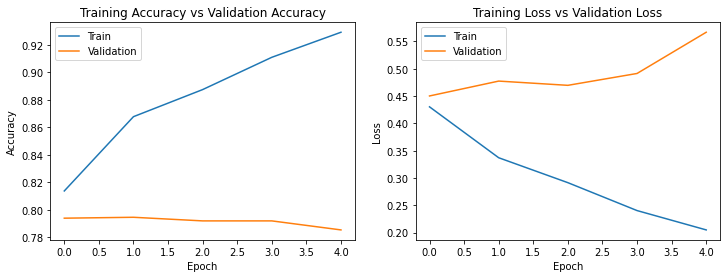

In [47]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

## Predict on Testing Data

In [51]:
testing_seq = token.texts_to_sequences(testing_data['text'])

In [52]:
test_padded = pad_sequences(testing_seq,padding="post",truncating="post",maxlen=50)

In [53]:
pred = model.predict(test_padded)

102/102 [==============================] - 3s 16ms/step


In [54]:
len(pred)

3263

In [65]:
test_prediction = []
for i in pred:
    if i[0]>0.5:
        test_prediction.append(1)
    else:
        test_prediction.append(0)

In [66]:
testing_data['target'] = test_prediction

In [67]:
testing_data.sample(5)

,id,keyword,location,text,target
2577,8594,seismic,Singapore,A subcontractor working for French seismic sur...,1
566,1849,burned,NaN,Corey White talking all dat shit but he got bu...,1
567,1850,burned,"Indianapolis, IN",@BlackHatWriter Yeah I'm going to be at home b...,0
1199,3941,devastated,Ireland,@_Gags_ My Mommy will be devastated lol #NoMor...,0
2120,7099,military,NaN,Admiral Says Public Schools Nationwide Shortch...,0
